In [2]:
import markovModels as mm
from extractFeatures import *
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np

#/!\ Only if restarting the kernel :
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

## Loading data

In [3]:
choralesTempo = np.load("data/encodedChoralesTempo.npy")
choralesVoices = np.load("data/encodedChoralesVoices.npy")
#Flatten choral to create a simple monodic phrase
choralesVoicePrim = choralesVoices.flatten()
choralesTempPrim = choralesTempo.flatten()
#Remove zeros
choralesVoice = [choralesVoicePrim[i] for i in range(len(choralesVoicePrim)) if choralesTempPrim[i]!=0.0]
choralesTemp = [choralesTempPrim[i] for i in range(len(choralesVoicePrim)) if choralesTempPrim[i]!=0.0]
musicalData = [str(choralesVoice[i])+"°"+str(choralesTemp[i]) for i in range(len(choralesVoice))]

In [1]:
s = set(musicalData)
print("Taille du vocabulaire", len(s))

NameError: name 'musicalData' is not defined

##  Training Markov Models

100%|██████████| 79993/79993 [00:00<00:00, 278230.38it/s]


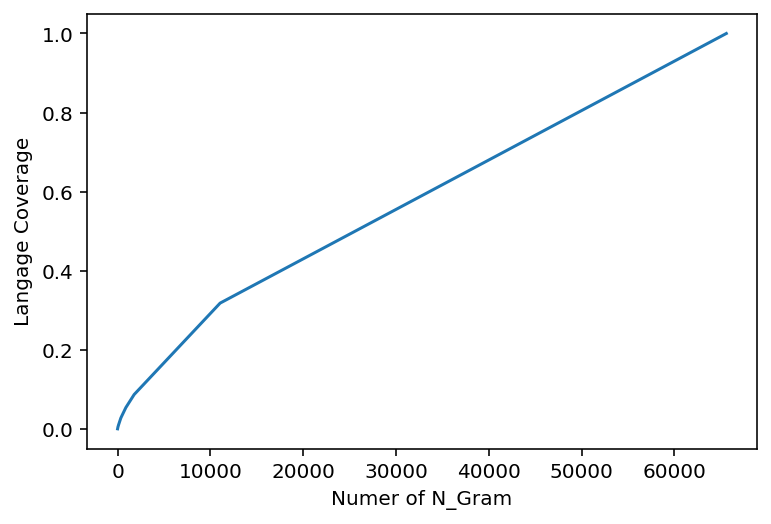

In [48]:
modelVoice = mm.MMarkov(7)
modelVoice.fit(musicalData[:80000])
modelVoice.langageCoverage()

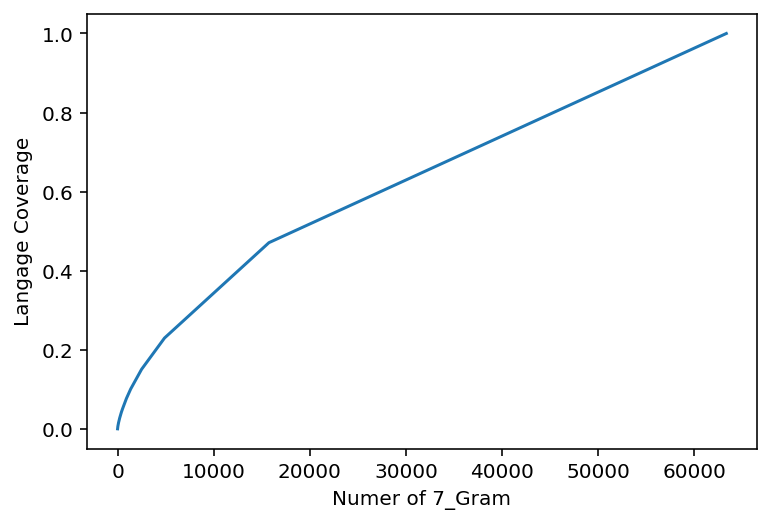

In [32]:
len(modelVoice.transition_matrix.T)

46

[ 3.8286414   7.65728279 11.48592419 15.31456559 19.14320698 22.97184838
 26.80048978]


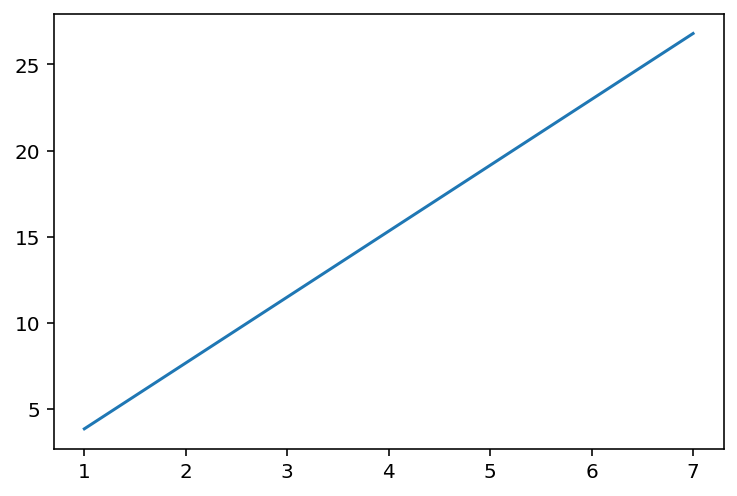

In [30]:
ngrams = []
for order in range(1,8) :
    ngrams.append(modelVoice.vocab_size**order)
print(np.log(ngrams))
plt.plot([1,2,3,4,5,6,7], np.log(ngrams))

100%|██████████| 89993/89993 [00:00<00:00, 387938.15it/s]


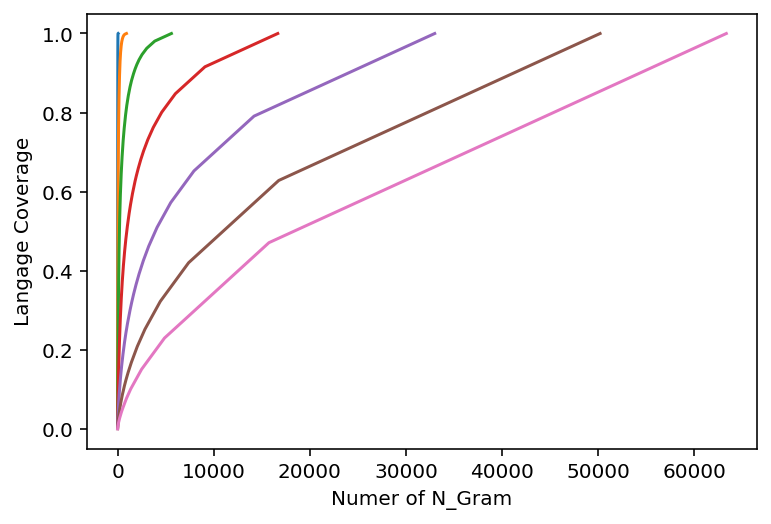

In [4]:
lCoverage =[]
for i in range(1,8) :
    modelVoice = mm.MMarkov(i)
    modelVoice.fit(choralesVoice[:90000])
    lCoverage.append(modelVoice.langageCoverage())

In [7]:
lCoverage[0]

array([0.09286667, 0.17458889, 0.2522    , 0.32464444, 0.38133333,
       0.43756667, 0.48641111, 0.53466667, 0.58137778, 0.62634444,
       0.66216667, 0.69698889, 0.73061111, 0.75608889, 0.77974444,
       0.80094444, 0.82131111, 0.84075556, 0.85788889, 0.87402222,
       0.88857778, 0.90307778, 0.91673333, 0.93006667, 0.94093333,
       0.9492    , 0.95574444, 0.96177778, 0.96711111, 0.97187778,
       0.9759    , 0.97978889, 0.98363333, 0.98688889, 0.98993333,
       0.99287778, 0.99413333, 0.99525556, 0.99613333, 0.9969    ,
       0.9976    , 0.99825556, 0.99862222, 0.99891111, 0.99913333,
       0.99931111, 0.99946667, 0.99954444, 0.99961111, 0.99967778,
       0.99973333, 0.99977778, 0.99982222, 0.99986667, 0.9999    ,
       0.99993333, 0.99995556, 0.99997778, 1.        ])

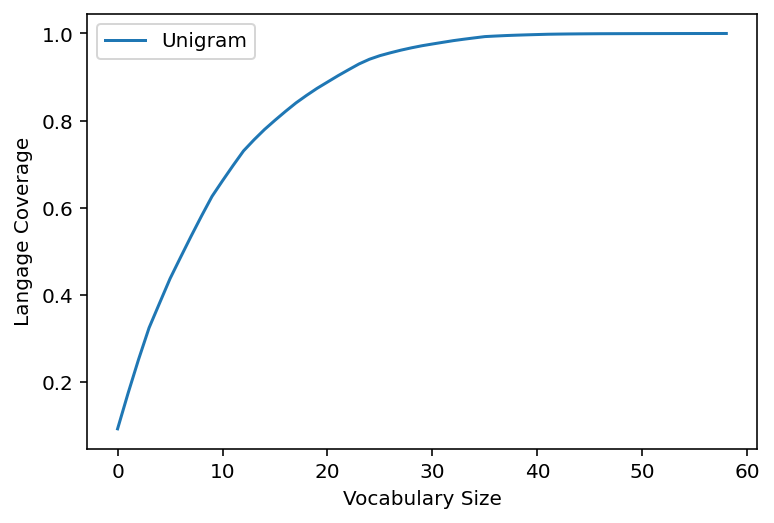

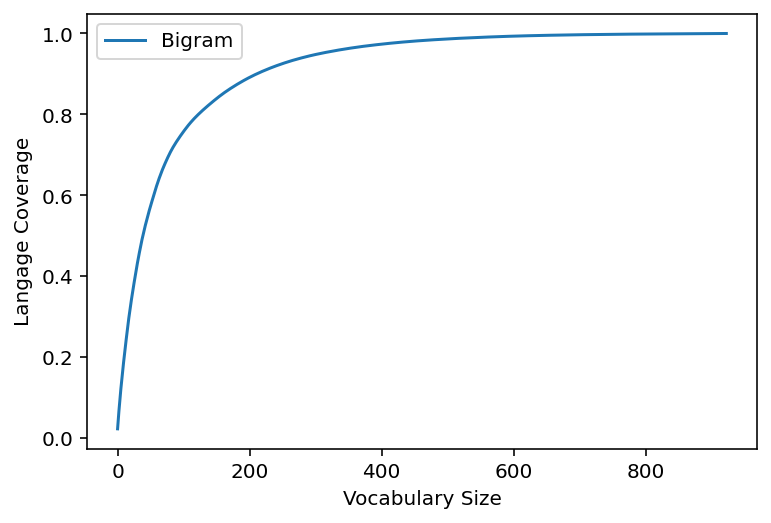

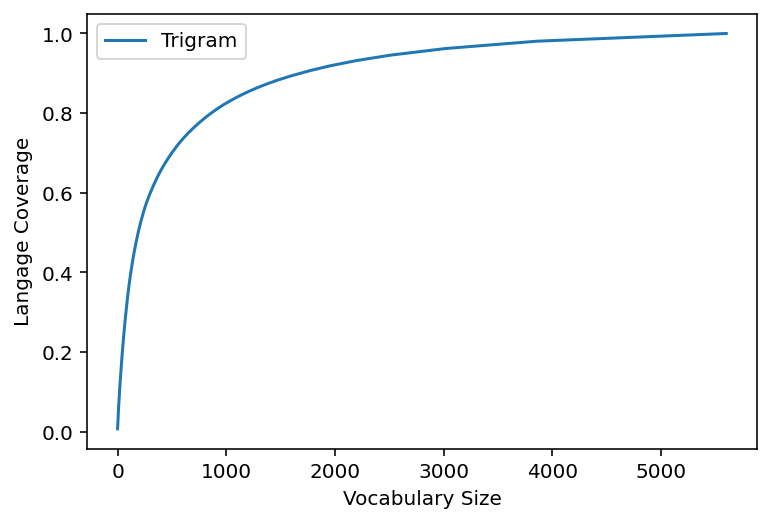

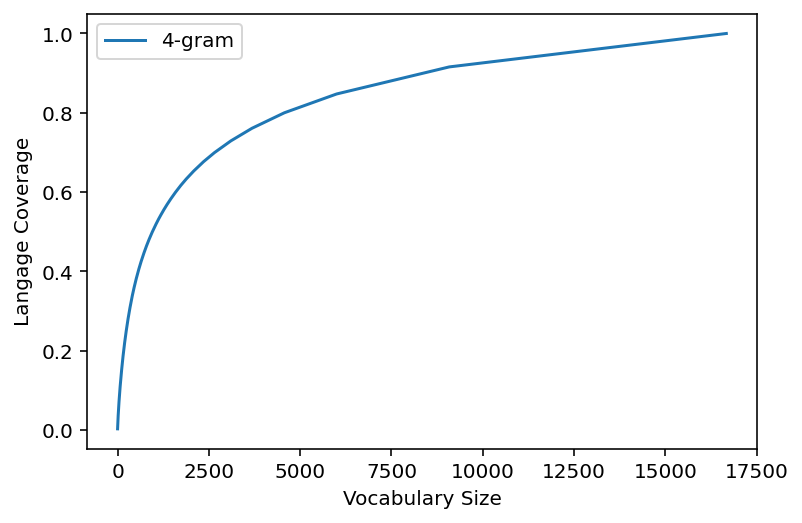

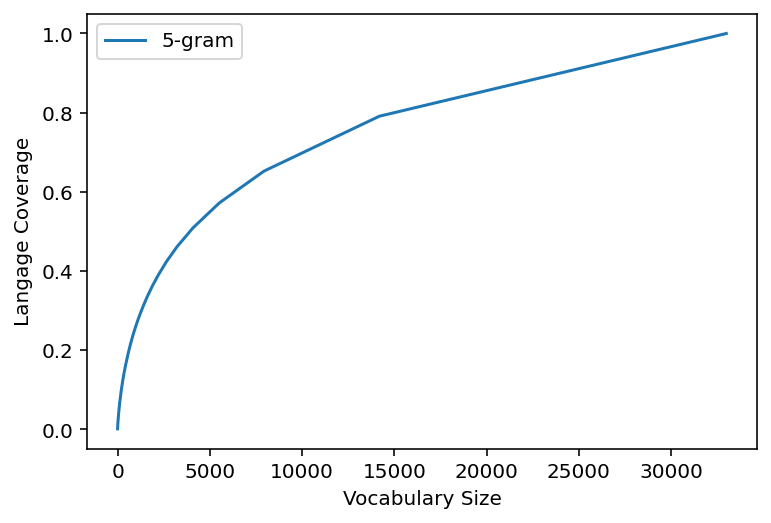

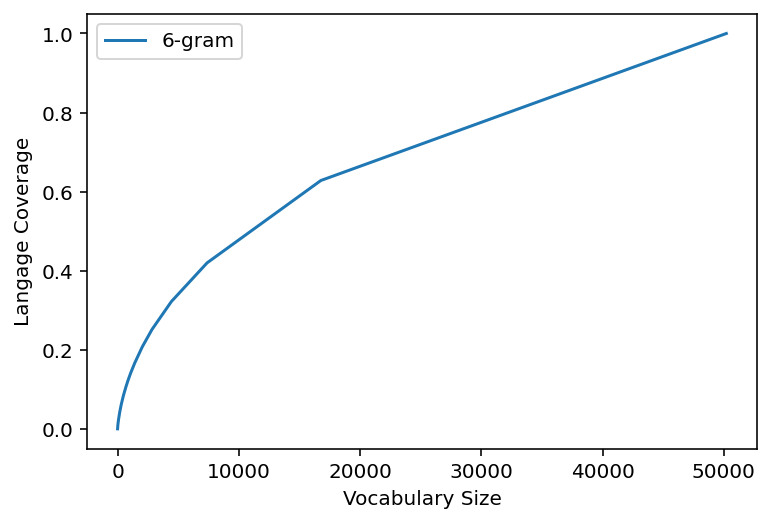

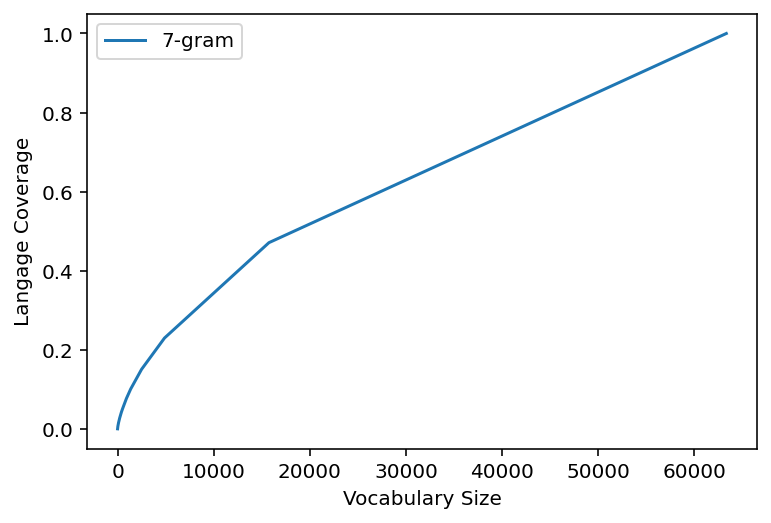

In [11]:
labels=["Unigram", "Bigram", "Trigram", "4-gram","5-gram", "6-gram", "7-gram"]
for i in range(7) :
    plt.plot(lCoverage[i], label = labels[i])
    plt.ylabel("Langage Coverage")
    plt.xlabel("Vocabulary Size")
    plt.legend()
    plt.show()


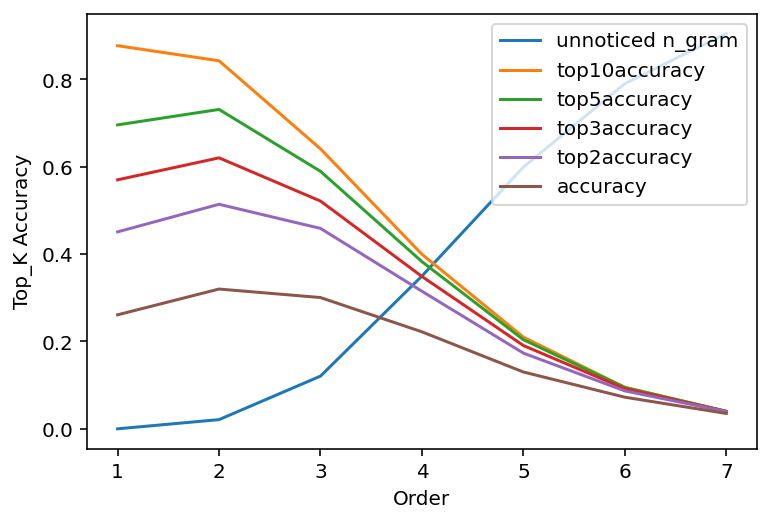

In [32]:
plt.plot([1,2,3,4,5,6,7], unseen, label = 'unnoticed n_gram')
plt.plot([1,2,3,4,5,6,7], top10accuracy, label = 'top10accuracy')
plt.plot([1,2,3,4,5,6,7], top5accuracy, label = 'top5accuracy')
plt.plot([1,2,3,4,5,6,7], top3accuracy, label = 'top3accuracy')
plt.plot([1,2,3,4,5,6,7], top2accuracy, label = 'top2accuracy')
plt.plot([1,2,3,4,5,6,7], accurracy, label = "accuracy")
plt.ylabel('Top_K Accuracy')
plt.xlabel('Order')
plt.legend(loc='upper right')
plt.show()

In [3]:
a = np.array([1,2,3])